# Load emissivity data

In this example, you will lear how to load data from emissivity grid and do simple interpolation. As a first step, you will need to import innet and pyneb library. Pyneb is a tool to compute emission line emissivities.

In [1]:
import innate
import pyneb as pn

First, load the emissivity data in HDF5 format as follows:

In [2]:
data_file = '../data/emissivity_grids.nc'
emissivities = innate.DataSet.from_file(data_file)

Data set "O2_3726A_m" is missing:
Parametrisation formula ("eqn" key in dataset configuration).
Parametrisation coefficients ("eqn_coeffs" key in dataset configuration).
Data set "H1_4861A" is missing:
Parametrisation formula ("eqn" key in dataset configuration).
Parametrisation coefficients ("eqn_coeffs" key in dataset configuration).
Data set "Fe3_4658A" is missing:
Parametrisation formula ("eqn" key in dataset configuration).
Parametrisation coefficients ("eqn_coeffs" key in dataset configuration).
Data set "Ne3_3869A" is missing:
Parametrisation formula ("eqn" key in dataset configuration).
Parametrisation coefficients ("eqn_coeffs" key in dataset configuration).


As a next step, you will compute an approximated value for the emissivity of twice ionized oxygen (O$^{2+}$) for a wavelength 5007 $\mathrm{\mathring A}$ (500.7 nm), i.e., O3_5007A point, for temperature 12250 K and density 122 particles/cm$^3$ using Regular Grid Interpolator.

In [5]:
temp, den = 12250, 122
interp_value_innate = emissivities['O3_5007A'].approx.interp.rgi((temp, den)).eval()
print(f'Interpolated value for O3_5007A is: {interp_value_innate}')

Interpolated value for O3_5007A is: [54144.39828319]


To confirm the accuracy of the interpolation, let's compare the interpolated value with the one obtained by RegularGridInterpolator from scipy library:

In [6]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np

data = emissivities['O3_5007A'].data
x = list(emissivities['O3_5007A'].axes_range.values())[0]
y = list(emissivities['O3_5007A'].axes_range.values())[1]

xg, yg = np.meshgrid(x, y, indexing='ij', sparse=True)

interp = RegularGridInterpolator((x, y), data)

interpol_value_scipy = interp([12250, 122])

print(f'Interpolated value for O3_5007A from scipy is: {interpol_value_scipy}')

difference = interpol_value_scipy - interp_value_innate

print(f'Difference between the intepolations is: {difference}')


Interpolated value for O3_5007A from scipy is: [54144.39828319]
Difference between the intepolations is: [0.]


From this comparison, you can see that Innate automates the interpolation process and provides the same accuracy as methods implemented in other libraries.

Input data sets often contain additional approximation techniques, which can be accessed from the interpolation (interpl) and regression (reg) objects as provided by the input dataset file. For example, the current dataset includes a parametrization for the 2D grids:

In [14]:
default_interp = np.power(10, emissivities['O3_5007A'].approx.reg.eqn(12250, 122))
print(f'The interpolate value base on the input file is: {default_interp}')

The interpolate value base on the input file is: 53958.97921168786


The difference between the values is:

In [15]:
difference_default = interp_value_innate - default_interp 
print(f'Difference between the intepolations is: {difference_default}')

Difference between the intepolations is: [185.4190715]


In 2D datasets, it is possible to validate the quality of the interpolation from innate and the original data file and visualise the errors using a plotting function: 

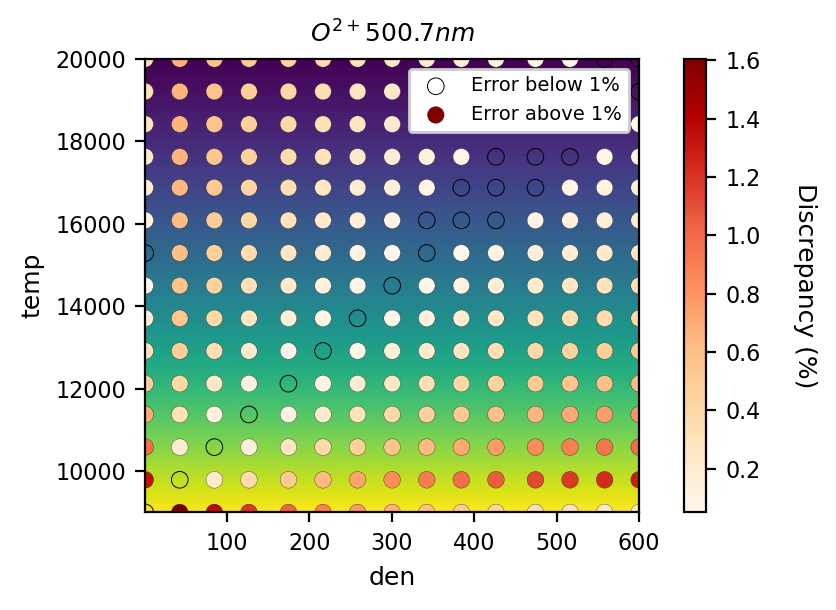

In [11]:
emissivities['O3_5007A'].plot.matrix_diagnostic(ax_cfg={'title': '$O^{2+} 500.7nm$'})

We can compare this plot with another transitions, for example for emission of ionized hydrogen (H$^+$) for a wavelength 656.3 nm:

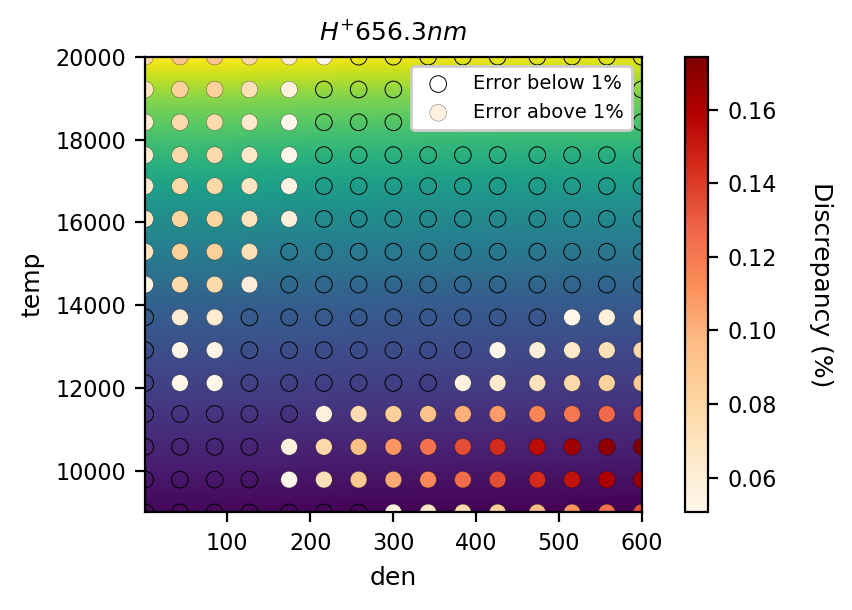

In [16]:
emissivities['H1_6563A'].plot.matrix_diagnostic(ax_cfg={'title': '$H^{+} 656.3nm$'})

We can see the second set of emissivities has a high discrepancy in the low-temperature region with high density. This indicates that we should review the chosen approximation technique and possibly select one with higher accuracy.